In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from channel_engineering import lab_to_rgb, rgb_to_lab
import matplotlib.pyplot as plt

Files already downloaded and verified


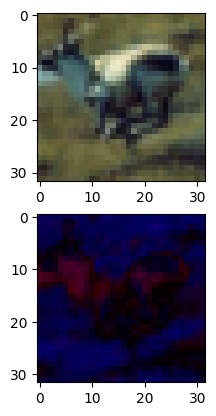

In [18]:


# Load the CIFAR-10 
transform = transforms.Compose([transforms.ToTensor()]) 
dataset = torchvision.datasets.CIFAR10(root="./data", train=False, download=True, transform=transform)

batch_size = 16
data_loader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

images, _ = next(iter(data_loader))  # (batch_size, 3, H, W)
images = images.permute(0, 2, 3, 1) # (batch_size, H, W, 3)
# Move to LAB and back to RGBµ

fig, axes = plt.subplots(2,1)

axes[0].imshow(images[0].numpy().squeeze())
lab_images = rgb_to_lab(images)  # Convert to LAB
lab_images = torch.abs(lab_images)
lab_images[:,:,:,0] = lab_images[:,:,:,1]
lab_images[:,:,:,2] = lab_images[:,:,:,2]
lab_images[:,:,:,1] = 0
lab_images*=2
(axes[1].imshow(lab_images[0].numpy().squeeze()))
